In [29]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

from skimage import filters as skifilters

In [2]:
def convolve2d(image, kernel):

    kernel = np.flipud(np.fliplr(kernel))    
    output = np.zeros_like(image)            
    
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     
        for y in range(image.shape[0]):
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output


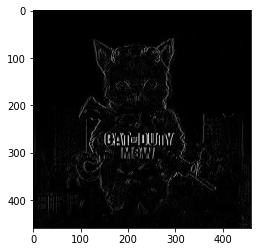

In [34]:
img = io.imread('cm3.jpg')    
img = color.rgb2gray(img)       

#vertical edges
kernel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]])

image_x = convolve2d(img,kernel_x)

#horizontal edges
kernel_y = np.array([        
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]])

image_y= convolve2d(img,kernel_x)

image_m = np.sqrt(image_x**2 + image_y**2) / np.sqrt(2)

plt.imshow(image_m, cmap=plt.cm.gray)

plt.show()

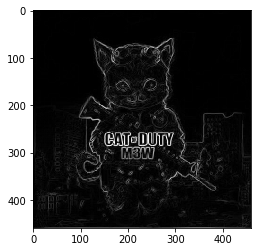

In [33]:
#test
ground_truth = skifilters.sobel(img)
plt.imshow(ground_truth,cmap=plt.cm.gray)
plt.show()